<img src="https://miro.medium.com/max/2520/1*3rMzzcOz933RVvaO17UVLg.jpeg">

In [2]:
!wget  -O "Roboto.zip" "https://fonts.google.com/download?family=Roboto"

--2020-10-05 06:21:41--  https://fonts.google.com/download?family=Roboto
Resolving fonts.google.com (fonts.google.com)... 74.125.142.139, 74.125.142.101, 74.125.142.138, ...
Connecting to fonts.google.com (fonts.google.com)|74.125.142.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘Roboto.zip’

Roboto.zip              [  <=>               ]   1.07M  4.08MB/s    in 0.3s    

2020-10-05 06:21:42 (4.08 MB/s) - ‘Roboto.zip’ saved [1124235]



In [3]:
!unzip "Roboto.zip"

Archive:  Roboto.zip
  inflating: LICENSE.txt             
  inflating: Roboto-Thin.ttf         
  inflating: Roboto-ThinItalic.ttf   
  inflating: Roboto-Light.ttf        
  inflating: Roboto-LightItalic.ttf  
  inflating: Roboto-Regular.ttf      
  inflating: Roboto-Italic.ttf       
  inflating: Roboto-Medium.ttf       
  inflating: Roboto-MediumItalic.ttf  
  inflating: Roboto-Bold.ttf         
  inflating: Roboto-BoldItalic.ttf   
  inflating: Roboto-Black.ttf        
  inflating: Roboto-BlackItalic.ttf  


In [4]:
!mv Roboto-Light.ttf  /usr/share/fonts/truetype/


Text(0.5, 1.0, 'test test te')

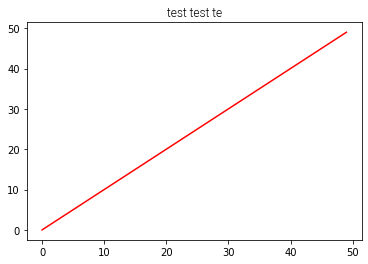

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/Roboto-Light.ttf'
fontprop = fm.FontProperties(fname=path, size= 12)
fontprop_title = fm.FontProperties(fname=path, size= 32)
fontprop_axis = fm.FontProperties(fname=path, size= 20)
plt.plot(range(50), range(50), 'r')
plt.title('test test te', fontproperties=fontprop)

In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import io
import plotly.express as px
from statistics import mean
%matplotlib inline

# 1. Choose .csv file on local drive

In [47]:
uploader = widgets.FileUpload(accept= '.csv',multiple=False)
display(uploader)


FileUpload(value={}, accept='.csv', description='Upload')

In [48]:
values = list(uploader.value.values()) # refactoring is needed

In [49]:
data_df = pd.read_csv(io.BytesIO(values[0]["content"]))


In [50]:
data_df = data_df.drop_duplicates(ignore_index=True)

In [51]:
def custom_head(df,n): # wrap
  return df.head(n)

In [52]:
#optional 
data_df = data_df.groupby(['Superclass'], as_index = False).sum()

In [53]:
interact(custom_head,df=fixed(data_df),n=widgets.IntSlider(min=1, max=30, step=1, value=8))

interactive(children=(IntSlider(value=8, description='n', max=30, min=1), Output()), _dom_classes=('widget-int…

<function __main__.custom_head>

In [54]:
select_column_x = widgets.Dropdown(
    options=list(data_df.columns),   
    description='Select column X',
    disabled=False,
)
display(select_column_x, "x value")

select_column_y = widgets.Dropdown(
    options=list(data_df.columns),    
    description='Select column Y',
    disabled=False,
)
display(select_column_y, "y value")

Dropdown(description='Select column X', options=('Superclass', 'Size', 'Images'), value='Superclass')

'x value'

Dropdown(description='Select column Y', options=('Superclass', 'Size', 'Images'), value='Superclass')

'y value'

In [59]:
column_x, column_y = select_column_x.value, select_column_y.value


# Graphs


In [56]:
def gradientbars(bars,lightness):
    grad = np.atleast_2d(np.arange(100)).T[::-1] 
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
     
    for i in range(len(bars)):
        bars[i].set_zorder(1)
        bars[i].set_facecolor("none")
        x,y = bars[i].get_xy()
        w, h = bars[i].get_width(), bars[i].get_height()
        ax.imshow(grad, extent=[x,x+w,y,y+h], aspect="auto", zorder=0,\
                  cmap=sns.light_palette((113.0,100.0,1 + (90/len(bars)) * (len(bars) - i) + lightness*i),input="husl", n_colors=len(data_df[column_x]), as_cmap = True))
        
    ax.axis(lim)


In [57]:
# pyplot library
def draw_gradient_barplot(width, height,lightness):
  fig, ax = plt.subplots()  
  bar = ax.bar(data_df[column_x],data_df[column_y], edgecolor = "green", linewidth=1,zorder=2)

  ax.set_ylabel(column_y,fontproperties=fontprop_axis)
  ax.set_xlabel(column_x,fontproperties=fontprop_axis)

  fig.set_figheight(height)
  fig.set_figwidth(width)
  gradientbars(bar,lightness)
  plt.xlim([-1,data_df[column_x].size])
  plt.xticks(data_df[column_x][::3], data_df[column_x][::3], rotation=270, fontproperties=fontprop) #зависимость от ширины? или просто переменная?

  plt.rcParams['axes.titlepad'] = 20
  plt.title('Size of image category', loc='left', fontproperties=fontprop_title, color="green")

  plt.hlines(np.arange(0,1500, 500), 0, len(data_df[column_x])-1,zorder=0, linewidth=1, color=(0.8, 0.8, 0.8))
  
  ax.spines["left"].set_visible(False)
  ax.spines["right"].set_visible(False)
  ax.spines["top"].set_visible(False)
  ax.spines["bottom"].set_visible(False)
  plt.show() 

In [60]:
interact(draw_gradient_barplot,
         width=widgets.IntSlider(min=0, max=50, step=1, value=22), \
         height=widgets.IntSlider(min=0, max=30, step=1, value=9),\
         lightness=widgets.IntSlider(min=0, max=30, step=1, value=8)) #borders and step, begin and end

interactive(children=(IntSlider(value=22, description='width', max=50), IntSlider(value=9, description='height…

<function __main__.draw_gradient_barplot>

In [61]:
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    b = mean(ys) - m*mean(xs)
    return m, b

def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [62]:
# pyplot library
from sklearn.metrics import r2_score
import scipy
from matplotlib.patches import Rectangle

def draw_scatter(elems, logscale=False): 
  xs = np.array(np.log(range(1,elems+1,1)), dtype=np.float64)
  ys = np.array(np.log(data_df.sort_values(by=column_y, ascending=False, ignore_index=True)[column_y][:elems]), dtype=np.float64)

  m, b = best_fit_slope_and_intercept(xs,ys)
  regression_line = [(m*x)+b for x in xs]

  fig, ax = plt.subplots()
  r_squared = coefficient_of_determination(ys,regression_line)
  ax.scatter(xs,ys,color='#7BC100',label='Log Data')
  ax.plot(xs, regression_line, color='gray', label='log regression line')

  extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
  legend = ax.legend(loc=1)
  legend.get_texts()[0].set_text(f'y = {m:.2f}*x+{b:.2f}')

  ax.grid(True)
 
  ax.set_ylabel(column_y,fontproperties=fontprop_axis)
  ax.set_xlabel(column_x,fontproperties=fontprop_axis)

  plt.title('Size of image category', loc='left',fontproperties=fontprop_title, color="green")

  if logscale:
    ax.set_yscale('log')
    ax.set_xscale('log')
  
  plt.show()
  
  print(f"R^2 sklearn: {r2_score(ys,regression_line)}")
  slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(ys,regression_line)
  print(f"R^2: {r_squared}")
  print(f"slope: {slope}")
  print(f"intercept: {intercept}")
  print(f"R value: {r_value}")
  print(f"P value: {p_value}")
  print(f"std err: {std_err}")

In [63]:
interact(draw_scatter, elems=widgets.IntSlider(min=2, max=len(data_df[column_y]), step=1, value=len(data_df[column_y])//2), logscale=False)

interactive(children=(IntSlider(value=3, description='elems', max=6, min=2), Checkbox(value=False, description…

<function __main__.draw_scatter>

In [66]:
column_y


'Size'

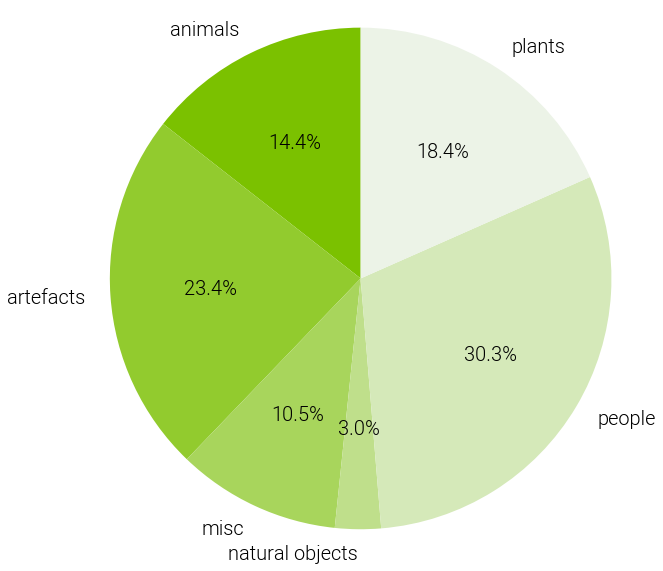

In [82]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = data_df[column_x]
sizes = data_df[column_y]



fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(10)



ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=sns.light_palette("#7bc100", reverse=True),textprops = {'fontproperties':fontprop_axis})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Palette

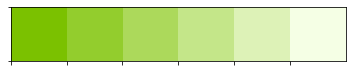

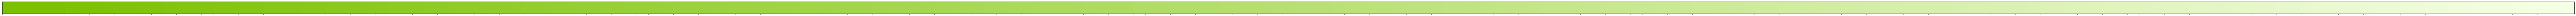

In [ ]:
sns.palplot(sns.light_palette("#7bc100", reverse=True)) #basic pallete
sns.palplot(sns.light_palette(("#7bc100"), n_colors=len(data_df[column_x]), reverse=True)) #gradient to all data


# Graphs

---




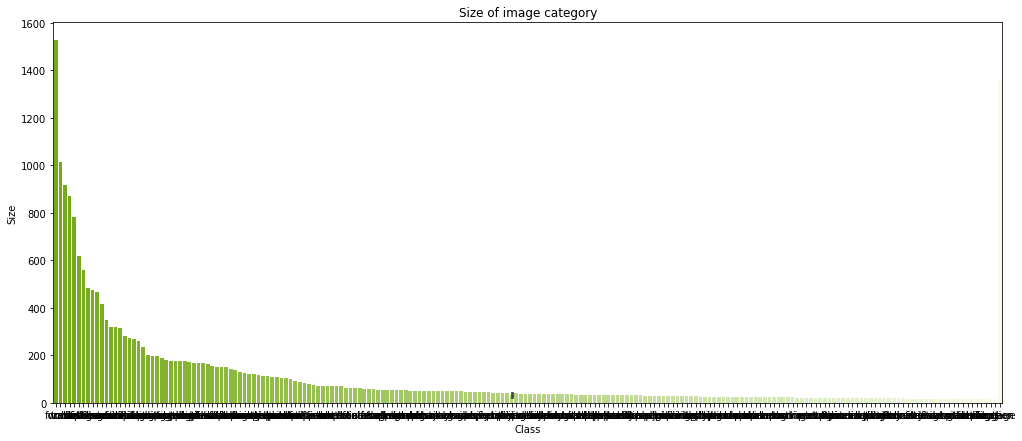

In [ ]:
# Seaborn library
f, ax = plt.subplots(figsize=(17, 7))
sns.barplot(x=column_x, y=column_y, data=data_df,
            palette=sns.light_palette("#7bc100", reverse=True, n_colors=len(data_df[column_x])))
plt.xlabel(column_x)
plt.ylabel(column_y)
plt.title('Size of image category')
plt.show()


In [ ]:
# PyPlot library
trace = go.Bar(
    x = data_df[column_x],
    y = data_df[column_y],
    marker_color='#7BC100'
  #  marker=dict(
       # color=("#7BC100", "#B4DD6D"),
   #     cmax=100,
    #    cmin=0,
   # ),
    
)

layout = go.Layout(
    title='Size of image category',
)


fig = go.Figure(data = [trace], layout = layout)
fig.show()

Coefficient sqr(R)

In [ ]:
xs = np.array(np.log(range(1,len(data_df['Size'])+1,1)), dtype=np.float64)
ys =np.array(np.log(data_df['Size']), dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    b = mean(ys) - m*mean(xs)
    return m, b

def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)
    
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]

r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)


0.8928014155807511


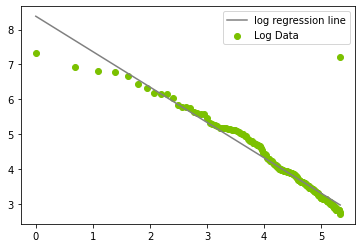

In [ ]:
plt.scatter(xs,ys,color='#7BC100',label='Log Data')
plt.plot(xs, regression_line, color='gray', label='log regression line')
plt.legend(loc=1)
plt.show()

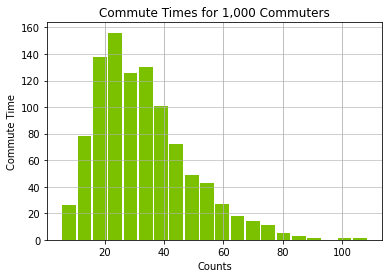

In [ ]:
#Some old code 

#import pandas as pd

# Generate data on commute times.
size, scale = 1000, 10
commutes = pd.Series(np.random.gamma(scale, size=size) ** 1.5)

commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#7BC100')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)